# Exploratory Data Analysis | Preprocessing Defined Function

### Checking my import functions properly. I am going to look at the shape and a transposed df of train to see the whole picture and brainstorm questions based on the data present.

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
from math import sqrt

# custom imports
import wrangle as w


In [46]:
train, val, test = w.wrangle_telco()
print(f'Train:', train.shape)
print(f'Val:', val.shape)
print(f'Test:', test.shape)

Found file
Train: (3943, 26)
Val: (1691, 26)
Test: (1409, 26)


### After some exploration i'm going to ask the data scientist questions to better understand and analyze my data for the target at hand.

---
<div class="alert alert-info">
    
**Explore your telco data to discover drivers of churn**
    
- Determine if certain columns should be dropped

- Determine if it would be valuable to bin some numeric columns

- Determine if it would be valuable to combine multiple columns into one.

- What are your drivers of churn?

**Does it make sense to combine any features?**

**Do you find any surprises?**

**Document any and all findings and takeaways in your notebook using markdown.**
        </div>

---
<div class="alert alert-success">
    
## **CATEGORICAL DATA EXPLORATION**
     

In [47]:
train.head()

,senior_citizen,tenure,monthly_charges,total_charges,gender,partner,dependents,phone,multiple_lines,online_security,...,churn,dsl,fiber_optic,month_to_month,one_year,two_year,bank_transfer_payment,credit_card_payment,electronic_payment,mailed_payment
4604,0,6,20.65,109.30,1,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,1
4051,1,9,54.55,494.05,1,0,0,1,1,1,...,1,1,0,1,0,0,0,0,1,0
5159,0,1,45.15,45.15,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
2974,1,60,93.25,5774.55,1,1,1,1,1,1,...,0,0,1,1,0,0,0,0,1,0
2979,0,6,45.00,298.70,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0


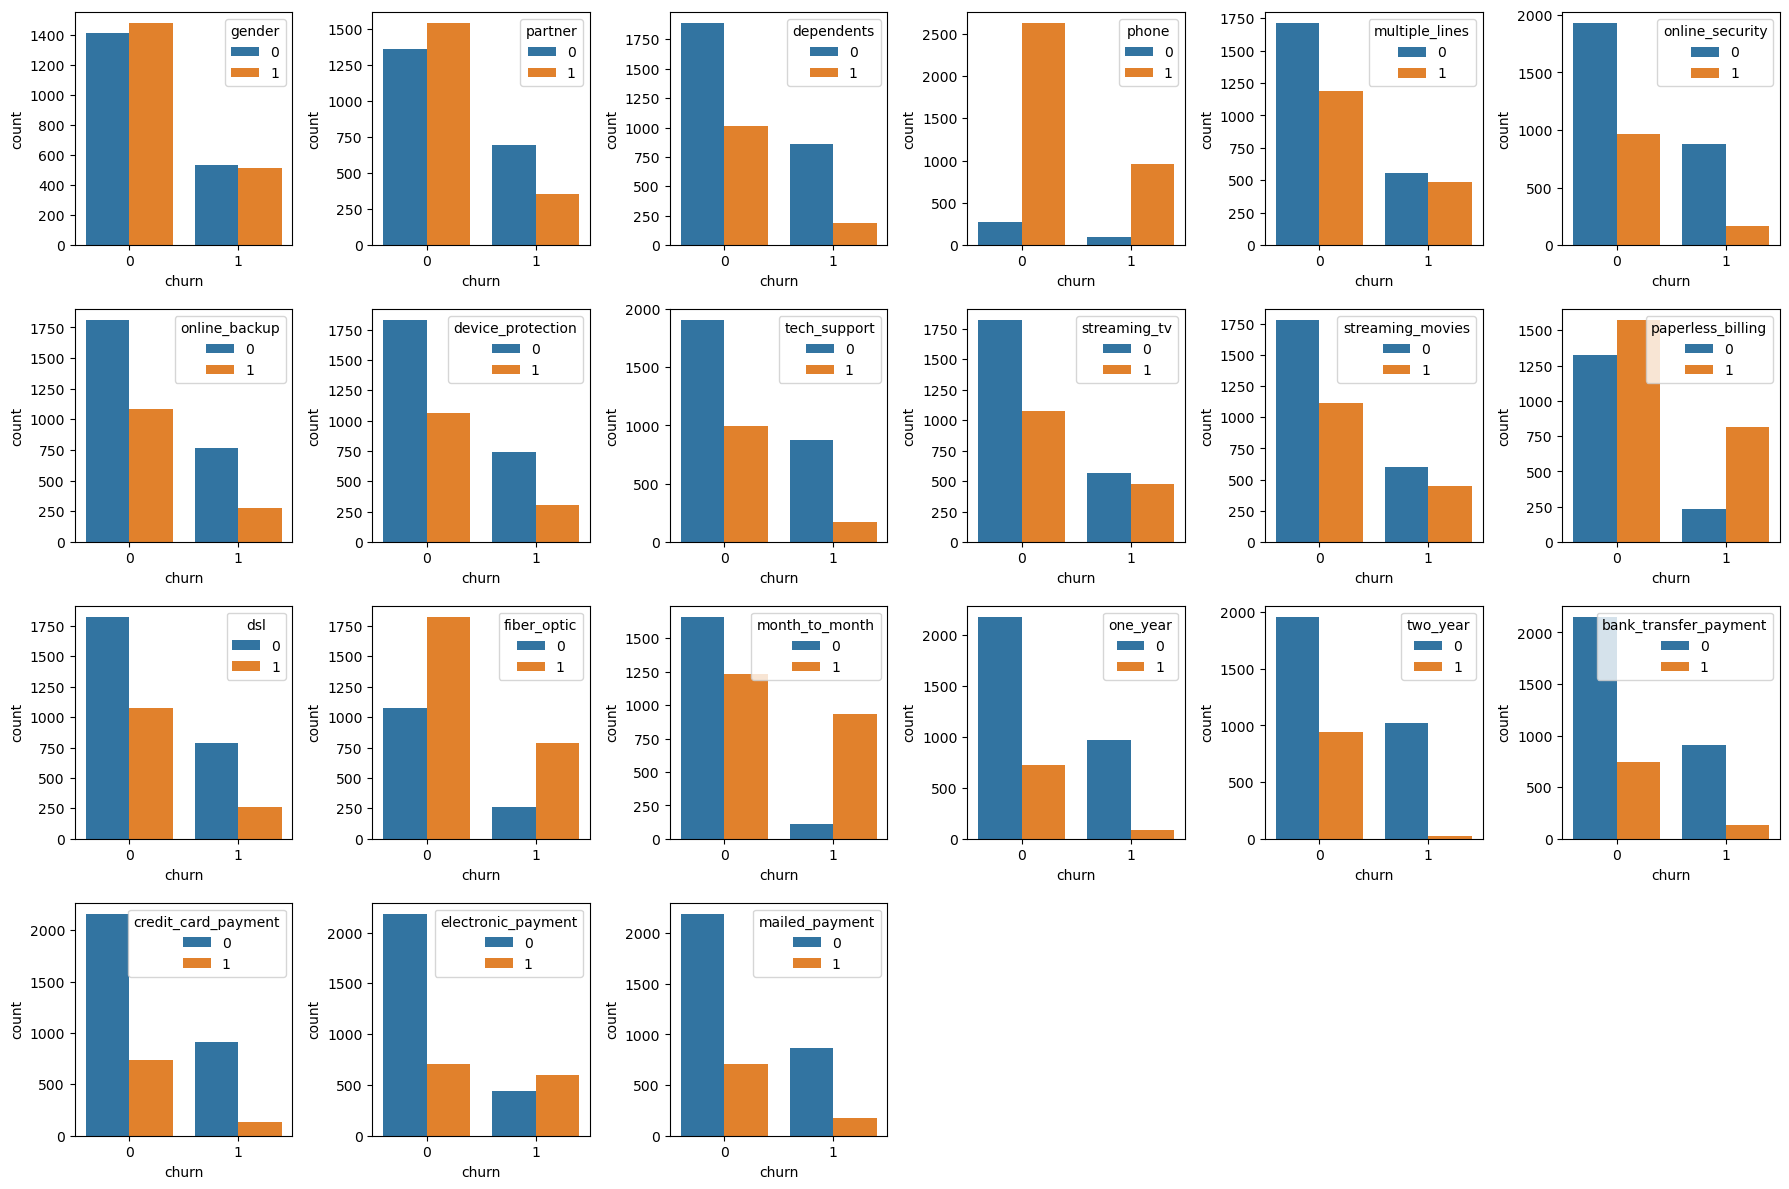

In [48]:
# Analyzing categorical features chosen below

plt.figure(figsize=(18, 12))


plt.subplot(4, 6, 1)
sns.countplot(data=train, x='churn', hue='gender')

plt.subplot(4, 6, 2)
sns.countplot(data=train, x='churn', hue='partner')

plt.subplot(4, 6, 3)
sns.countplot(data=train, x='churn', hue='dependents')

plt.subplot(4, 6, 4)
sns.countplot(data=train, x='churn', hue='phone')

plt.subplot(4, 6, 5)
sns.countplot(data=train, x='churn', hue='multiple_lines')

plt.subplot(4, 6, 6)
sns.countplot(data=train, x='churn', hue='online_security')

plt.subplot(4, 6, 7)
sns.countplot(data=train, x='churn', hue='online_backup')

plt.subplot(4, 6, 8)
sns.countplot(data=train, x='churn', hue='device_protection')

plt.subplot(4, 6, 9)
sns.countplot(data=train, x='churn', hue='tech_support')

plt.subplot(4, 6, 10)
sns.countplot(data=train, x='churn', hue='streaming_tv')

plt.subplot(4, 6, 11)
sns.countplot(data=train, x='churn', hue='streaming_movies')

plt.subplot(4, 6, 12)
sns.countplot(data=train, x='churn', hue='paperless_billing')

plt.subplot(4, 6, 13)
sns.countplot(data=train, x='churn', hue='dsl')

plt.subplot(4, 6, 14)
sns.countplot(data=train, x='churn', hue='fiber_optic')

plt.subplot(4, 6, 15)
sns.countplot(data=train, x='churn', hue='month_to_month')

plt.subplot(4, 6, 16)
sns.countplot(data=train, x='churn', hue='one_year')

plt.subplot(4, 6, 17)
sns.countplot(data=train, x='churn', hue='two_year')

plt.subplot(4, 6, 18)
sns.countplot(data=train, x='churn', hue='bank_transfer_payment')

plt.subplot(4, 6, 19)
sns.countplot(data=train, x='churn', hue='credit_card_payment')

plt.subplot(4, 6, 20)
sns.countplot(data=train, x='churn', hue='electronic_payment')

plt.subplot(4, 6, 21)
sns.countplot(data=train, x='churn', hue='mailed_payment')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

## Q1: Does being a senior citizen drive churn?

**Null Hypotesis ($H0$):** Senior citizen status is **independent** of churn.

**Alternative Hypotesis ($Ha$):** Senior citizen status is **dependent** on churn.

In [49]:
train.senior_citizen.value_counts()

0    3304
1     639
Name: senior_citizen, dtype: int64

In [50]:
observed = pd.crosstab(train.senior_citizen, train.churn)
observed

churn,0,1
senior_citizen,,
0,2526,778
1,371,268


In [51]:
def chi2_and_visualize(df, cat_var, target, a=0.05):
    observed = pd.crosstab(df[cat_var], df[target])
    chi2, p, degf, e = stats.chi2_contingency(observed)
    
    print(f'Chi2 Statistic: {chi2}\n')
    print(f'P-Value: {p}\n')
    # print(f'Degrees of Freedom: {degf}\n')
    # print(f'Expected: {e}\n')

    # Plotting the countplot
    title = f'{cat_var.capitalize()} Churned vs. Not Churned'
    plot_cp(df, target, cat_var, title)
    
    eval_p(p)

def plot_cp(data, x_col, hue_col, title):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=x_col, hue=hue_col)
    plt.title(title)
    plt.show()

def eval_p(p, a=0.05):
    if p < a:
        print(f'\nThe result is significant, we reject the null hypothesis with a p-value of {round(p, 2)}.')
    else:
        print(f'\nWe failed to reject the null hypothesis with a p-value of {round(p, 2)}.')

Chi2 Statistic: 91.99974913551424

P-Value: 8.66874699390739e-22



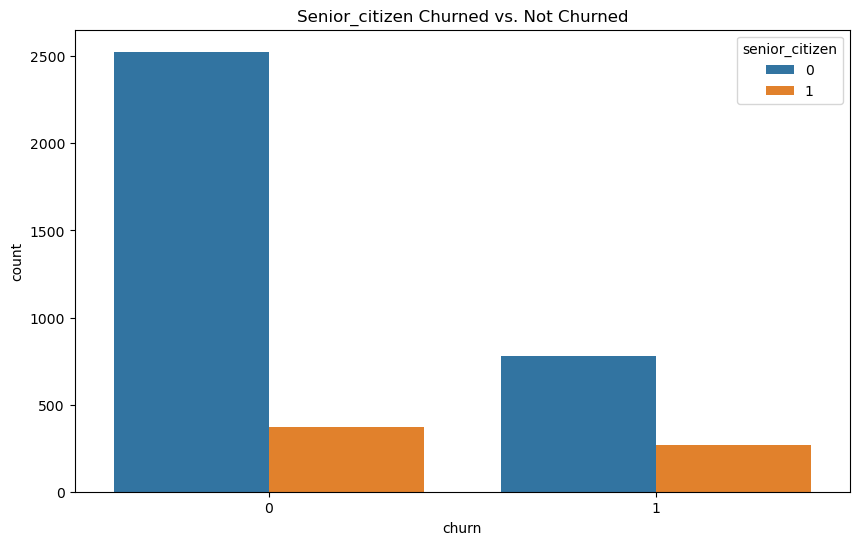


The result is significant, we reject the null hypothesis with a p-value of 0.0.


In [52]:
chi2_and_visualize(train, 'senior_citizen', 'churn')

### I will run a chi2 test for group membership

## Takeaway:

 ### Being a senior citizen does not make a customer more or less likely to churn.
 ---------------------------------------------------------------------------------

## Q2: Does online_security add on service drive churn?

**Null Hypotesis ($H0$):** Online security service is **NOT independent** of churn.

**Alternative Hypotesis ($Ha$):** Online security service is **independent** on churn.

In [53]:
train, val, test = w.wrangle_telco()

Found file


Chi2 Statistic: 109.40634009015375

P-Value: 1.3220602018928545e-25



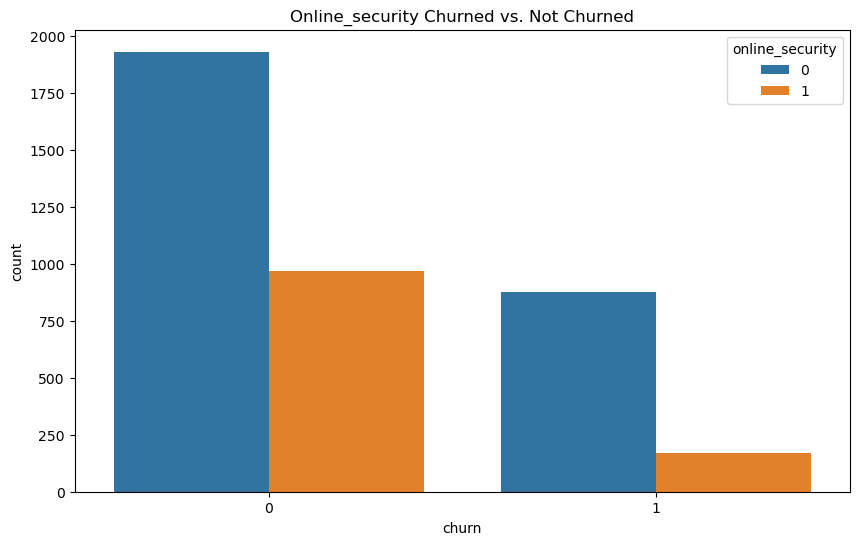


The result is significant, we reject the null hypothesis with a p-value of 0.0.


In [54]:
chi2_and_visualize(train, 'online_security', 'churn')

## Takeaway:

 ### Having or not having online security add on service does not make a customer more or less likely to churn.
 ---------------------------------------------------------------------------------

## Q3: Is the service type they offer drive churn?

**Null Hypotesis ($H0$):** Telco phone service type is **independent** of churn.

**Alternative Hypotesis ($Ha$):** Telco phone service type is **dependent** on churn.

In [55]:
# going to try to just test these how they are and observe results.
# train['churn'] = pd.Categorical(train['churn'])
train = train.loc[:, ['phone', 'dsl', 'fiber_optic', 'churn']]
train

,phone,dsl,fiber_optic,churn
4604,1,0,1,0
4051,1,1,0,1
5159,1,1,0,0
2974,1,0,1,0
2979,0,1,0,0
...,...,...,...,...
4993,1,1,0,0
3991,1,0,1,0
5229,1,1,0,1
6473,1,0,1,0


<div class="alert alert-warning"

    Error message received
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Cell In[27], line 1
    
--> 1 observed = pd.crosstab(train.phone_service, train.internet_service_type, train.churn)<br>
      2 observed<br>
<br>
File /opt/homebrew/anaconda3/lib/python3.10/site-packages/pandas/core/reshape/pivot.py:653, in crosstab(index, columns, values, rownames, colnames, aggfunc, margins, margins_name, dropna, normalize)<br>
    650     raise ValueError("aggfunc cannot be used without values.")<br>
    652 if values is not None and aggfunc is None:<br>
--> 653     raise ValueError("values cannot be used without an aggfunc.")<br>
    655 if not is_nested_list_like(index):<br>
    656     index = [index]<br>
<br>
ValueError: values cannot be used without an aggfunc.<br>
<div/>

<div class="alert alert-info"
    
Added aggfunc. as specfied
<div/>

did not appreciate outcome so i'm doing them separately.

In [56]:
observed = pd.crosstab(train.phone, train.churn)
observed

churn,0,1
phone,,
0,271,90
1,2626,956


Chi2 Statistic: 0.4338671508044712

P-Value: 0.5100974716264193



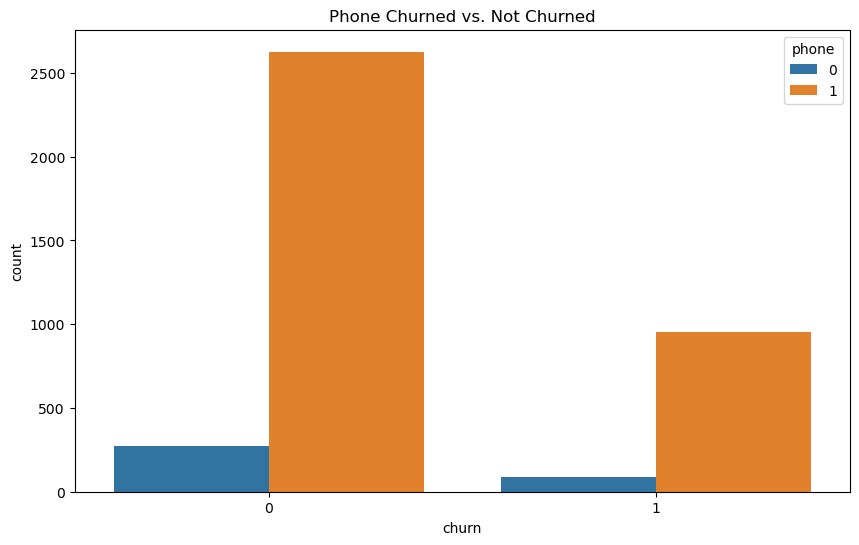


We failed to reject the null hypothesis with a p-value of 0.51.


In [57]:
chi2_and_visualize(train, 'phone', 'churn')

In [58]:
observed = pd.crosstab(train.dsl, train.churn)
observed

churn,0,1
dsl,,
0,1823,787
1,1074,259


Chi2 Statistic: 51.50864015344614

P-Value: 7.128269444966048e-13



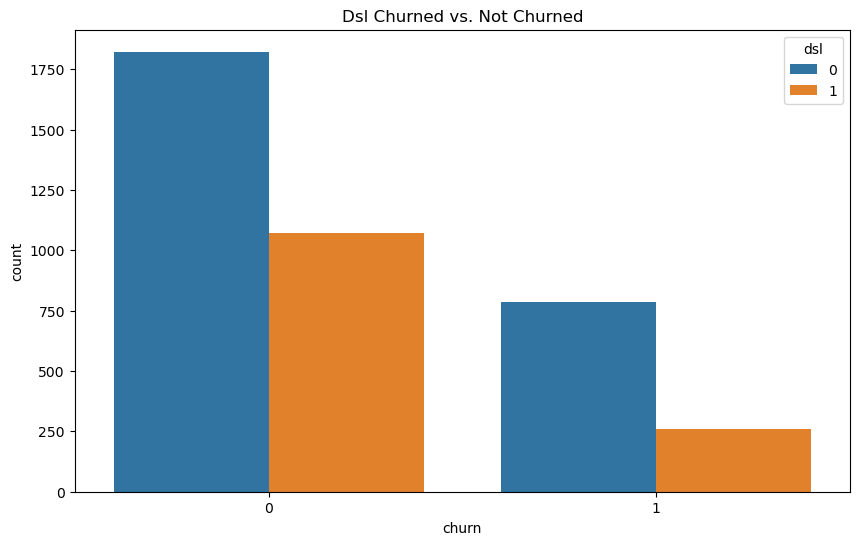


The result is significant, we reject the null hypothesis with a p-value of 0.0.


In [59]:
chi2_and_visualize(train, 'dsl', 'churn')

In [60]:
observed = pd.crosstab(train.fiber_optic, train.churn)
observed

churn,0,1
fiber_optic,,
0,1074,259
1,1823,787


Chi2 Statistic: 51.50864015344614

P-Value: 7.128269444966048e-13



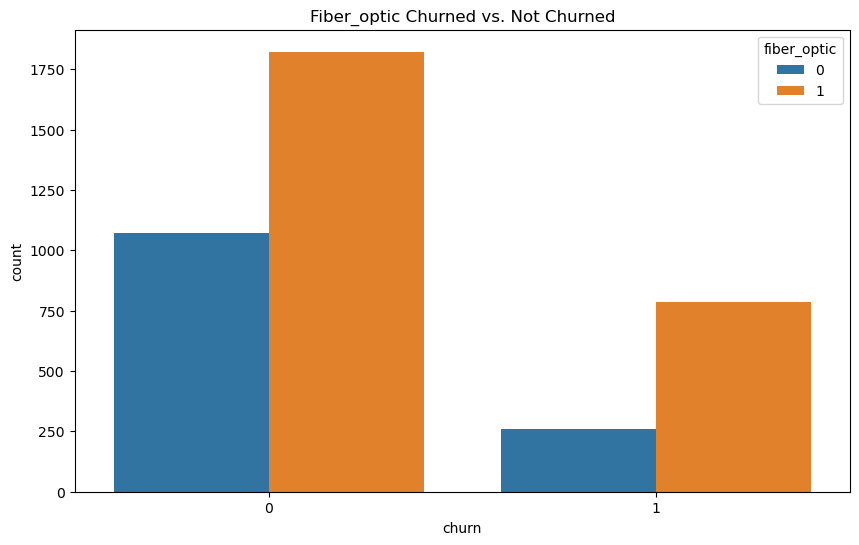


The result is significant, we reject the null hypothesis with a p-value of 0.0.


In [61]:
chi2_and_visualize(train, 'fiber_optic', 'churn')

## Takeaway:

 ### Having or not having internet service service of any type does not make a customer more or less likely to churn.
 ### * **I did however find that a customer having phone service does affect the probability of a customer more  or less like to churn.**

Q5: 

---
<div class="alert alert-success">
    
## **CONTINUOUS DATA EXPLORATION**

In [62]:
train, val, test = w.wrangle_telco()

Found file


In [63]:
train = train.loc[:, ['tenure', 'phone', 'total_charges', 'monthly_charges', 'churn']]
train

,tenure,phone,total_charges,monthly_charges,churn
4604,6,1,109.30,20.65,0
4051,9,1,494.05,54.55,1
5159,1,1,45.15,45.15,0
2974,60,1,5774.55,93.25,0
2979,6,0,298.70,45.00,0
...,...,...,...,...,...
4993,56,1,3457.45,59.80,0
3991,35,1,644.50,20.10,0
5229,64,1,4481.00,70.20,1
6473,44,1,4495.65,104.15,0


- **Pair plot of just numerical data**

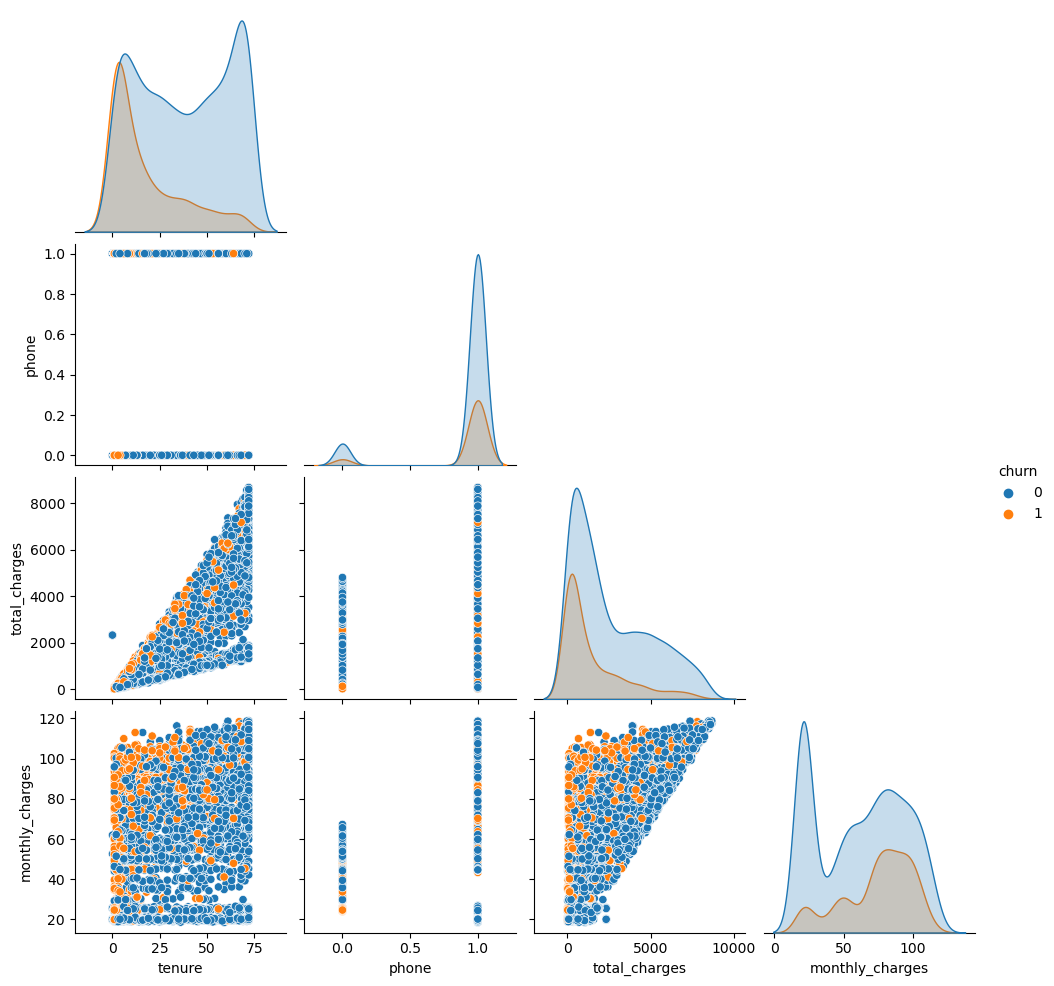

In [64]:
sns.pairplot(train, hue='churn', diag_kind='kde', corner=True)
plt.show()

- **Box plot of each discrete feature**

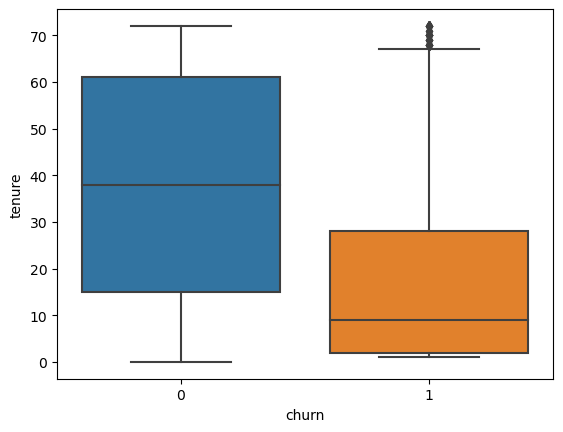

In [65]:
sns.boxplot(data=train, x='churn', y='tenure')
plt.show()

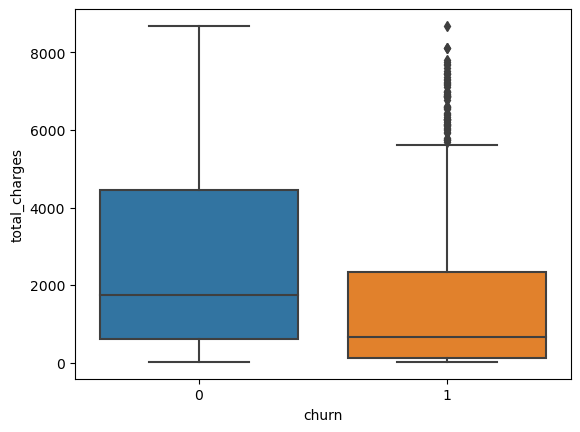

In [66]:
sns.boxplot(data=train, x='churn', y='total_charges')
plt.show()

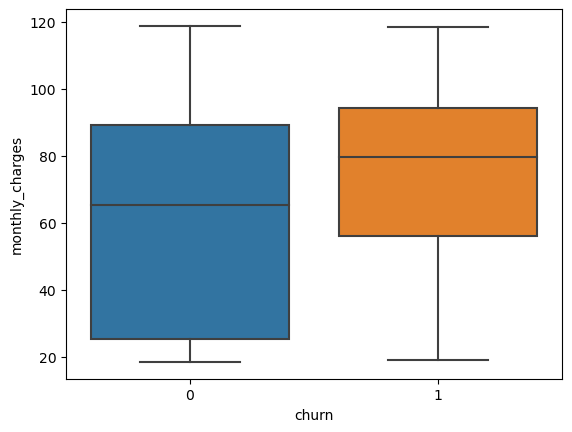

In [67]:
sns.boxplot(data=train, x='churn', y='monthly_charges')
plt.show()

- **Histograms of each feature**

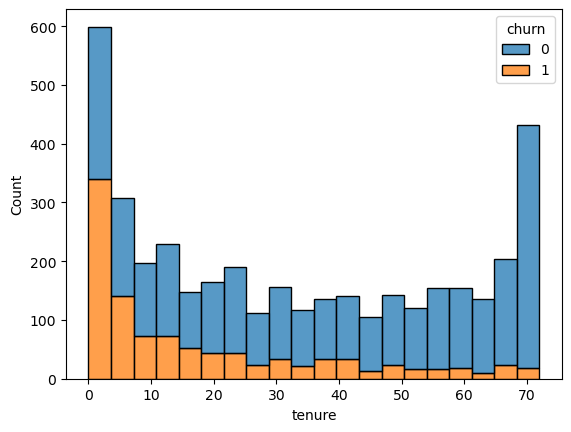

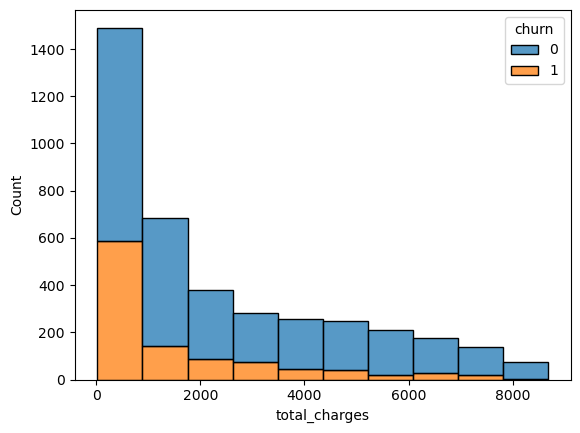

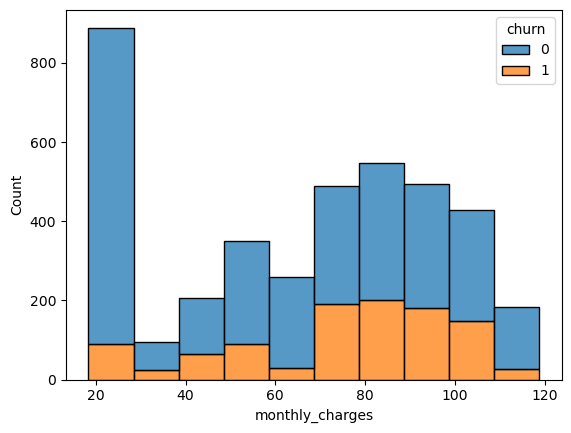

In [68]:

sns.histplot(data=train, x='tenure', hue='churn', multiple='stack', bins=20)
plt.show()

sns.histplot(data=train, x='total_charges', hue='churn', multiple='stack', bins=10)
plt.show()

sns.histplot(data=train, x='monthly_charges', hue='churn', multiple='stack', bins=10)
plt.show()


- **scatter plots of each feature**

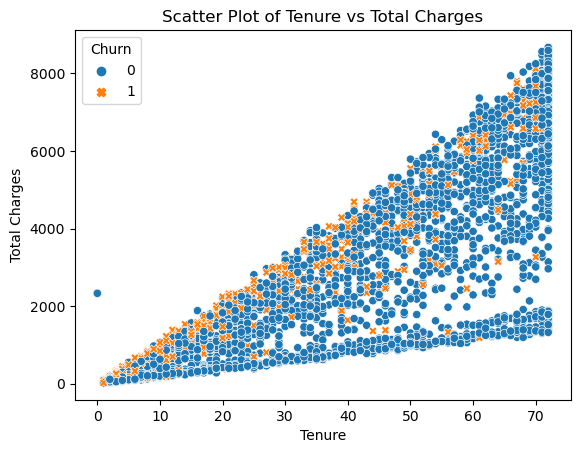

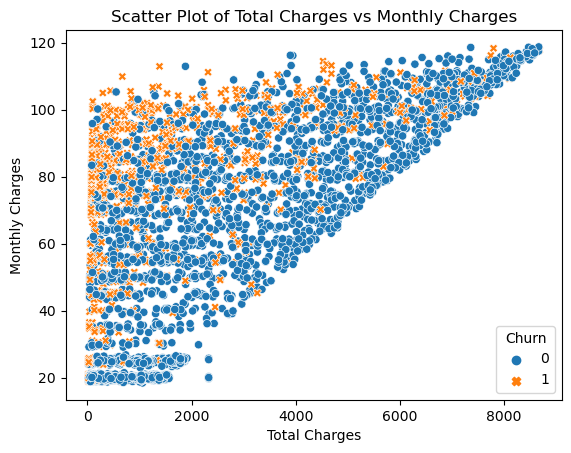

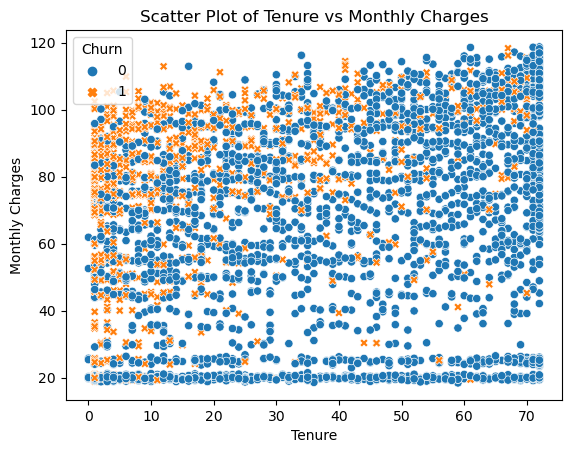

In [69]:
# Scatter plot for 'tenure'
sns.scatterplot(data=train, x='tenure', y='total_charges', hue='churn', style='churn')
plt.xlabel('Tenure')
plt.ylabel('Total Charges')
plt.title('Scatter Plot of Tenure vs Total Charges')
plt.legend(title='Churn')
plt.show()

# Scatter plot for 'total_charges'
sns.scatterplot(data=train, x='total_charges', y='monthly_charges', hue='churn', style='churn')
plt.xlabel('Total Charges')
plt.ylabel('Monthly Charges')
plt.title('Scatter Plot of Total Charges vs Monthly Charges')
plt.legend(title='Churn')
plt.show()

# Scatter plot for 'monthly_charges'
sns.scatterplot(data=train, x='tenure', y='monthly_charges', hue='churn', style='churn')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.title('Scatter Plot of Tenure vs Monthly Charges')
plt.legend(title='Churn')
plt.show()

- from the plotted data  above I can identify there is no normal distribution


## Q4: is there a relationship between monthly charges and total_charges?

**Null Hypotesis ($H0$):** There is **NO** linear correlation between monthly charges and total charges.

**Alternative Hypotesis ($Ha$):** There **IS** a linear correlation between monthly charges and total charges.

In [70]:
train.head()

,tenure,phone,total_charges,monthly_charges,churn
4604,6,1,109.30,20.65,0
4051,9,1,494.05,54.55,1
5159,1,1,45.15,45.15,0
2974,60,1,5774.55,93.25,0
2979,6,0,298.70,45.00,0


In [71]:
def pearson_r_test(data, x_col, y_col, a=0.05):
    # Calculate Pearson's correlation coefficient and p-value
    pearson_r, p_value = stats.pearsonr(data[x_col], data[y_col])

    print(f'Pearson\'s r: {pearson_r:.2f}\n')
    
    # Plot a scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=x_col, y=y_col, hue='churn')
    plt.title(f'Pearson\'s r Analysis: {x_col} vs. {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()
    
    if p_value < a:
        print(f'\nReject the null hypothesis. There is a linear correlation (p-value: {p_value:.2f})')
    else:
        print(f'\nWe fail to reject the null hypothesis that there is a linear correlation (p-value: {p_value:.2f})')

Pearson's r: 0.66



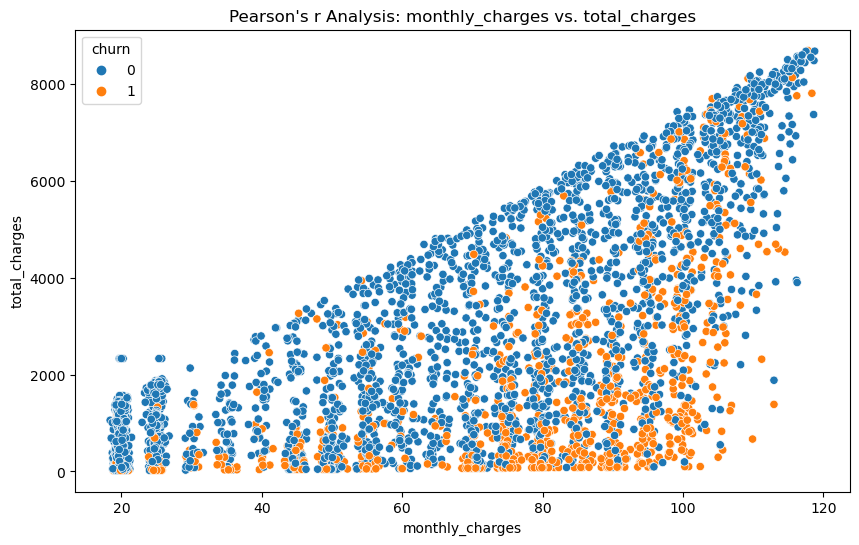


Reject the null hypothesis. There is a linear correlation (p-value: 0.00)


In [72]:
pearson_r_test(train, 'monthly_charges', 'total_charges')

Pearson's r: 0.83



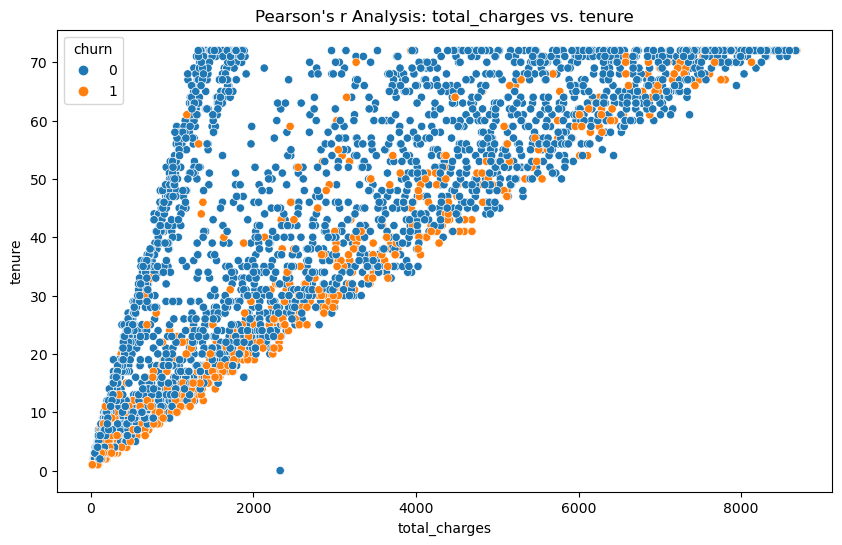


Reject the null hypothesis. There is a linear correlation (p-value: 0.00)


In [73]:
pearson_r_test(train, 'total_charges', 'tenure')

Pearson's r: 0.26



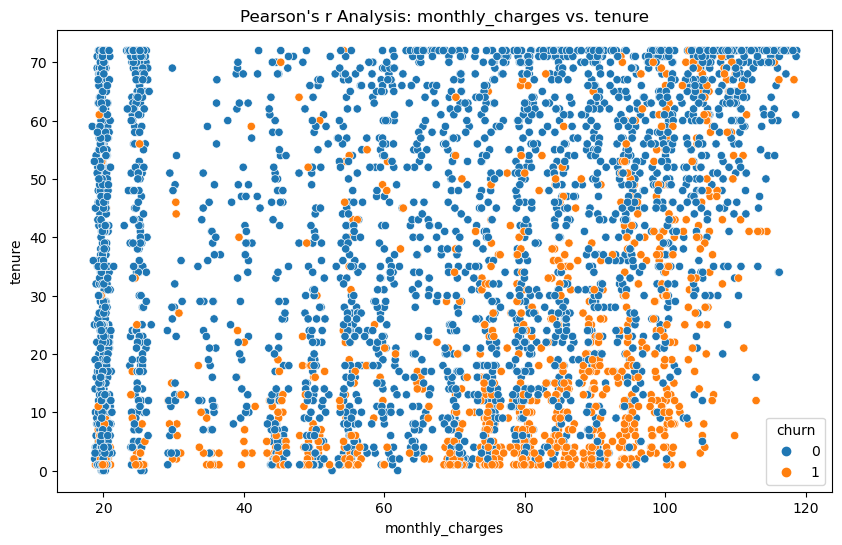


Reject the null hypothesis. There is a linear correlation (p-value: 0.00)


In [74]:
pearson_r_test(train, 'monthly_charges', 'tenure')

## Q5: is there a linear relationship between monthly charges and tenure?

**Null Hypotesis ($H0$):** There **IS** a linear correlation between tenure and total charges.

**Alternative Hypotesis ($Ha$):** There is **NOT** a linear correlation between tenure and total charges.

Spearman's r: 0.30

This suggests a moderate positive correlation between variables. As monthly charges increase, tenure tends to increase.
This does not mean there is a strong relationship. They are moderately associated.



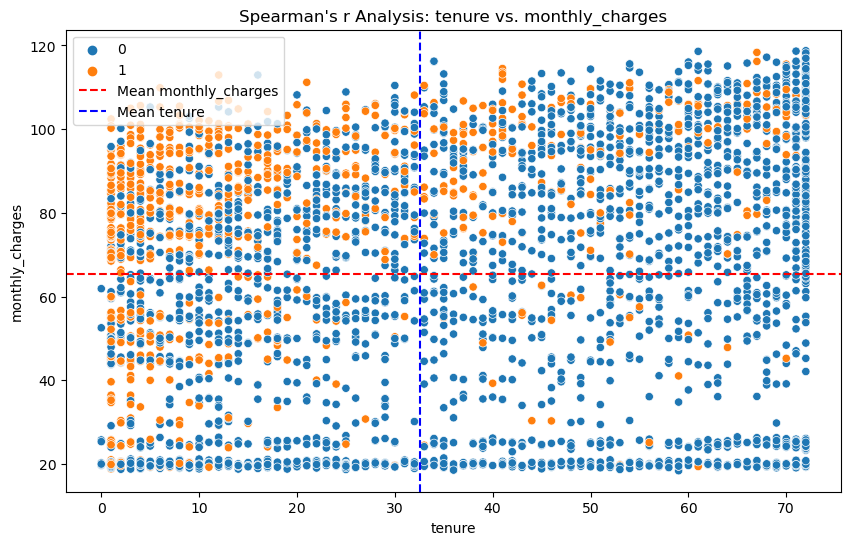


We Reject the null hypothesis. There is a linear correlation (p-value: 0.00)


In [90]:
def spearman_r_analysis(data, x_col, y_col, alpha=0.05):
    # Calculate Spearman's rank correlation coefficient and p-value
    spearman_r, p_value = stats.spearmanr(data[x_col], data[y_col])

    print(f'Spearman\'s r: {spearman_r:.2f}\n')
    print(f'This suggests a moderate positive correlation between variables. As monthly charges increase, tenure tends to increase.')
    print(f'This does not mean there is a strong relationship. They are moderately associated.\n')
    
    # Plot a scatter plot
    plt.figure(figsize=(10, 6))
    ax = sns.scatterplot(data=data, x=x_col, y=y_col, hue='churn')
    
    # Add mean lines
    ax.axhline(data[y_col].mean(), color='red', linestyle='dashed', label='Mean ' + y_col)
    ax.axvline(data[x_col].mean(), color='blue', linestyle='dashed', label='Mean ' + x_col)
    
    plt.title(f'Spearman\'s r Analysis: {x_col} vs. {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend()
    plt.show()
    
    if p_value < alpha:
        print(f'\nWe Reject the null hypothesis. There is a linear correlation (p-value: {p_value:.2f})')
    else:
        print(f'\nWe fail to reject the null hypothesis that there is a linear correlation (p-value: {p_value:.2f})')

# Example usage
spearman_r_analysis(train, 'tenure', 'monthly_charges')

## Q6: is there a there is a significant difference in the average monthly charges between customers who have phone and customers who don't have phone service?

**Null Hypotesis ($H0$):** There is a **not significant difference** in the average monthly charges between customers who have phone and customers who don't have phone service.

**Alternative Hypotesis ($Ha$):** There is a **significant difference** in the average monthly charges between customers who have phone and customers who don't have phone service.

In [76]:
avg_monthly_charges = np.mean(train.monthly_charges)
avg_monthly_charges

65.38983007862034

In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 4604 to 6377
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tenure           3943 non-null   int64  
 1   phone            3943 non-null   uint8  
 2   total_charges    3943 non-null   float64
 3   monthly_charges  3943 non-null   float64
 4   churn            3943 non-null   uint8  
dtypes: float64(2), int64(1), uint8(2)
memory usage: 130.9 KB


In [78]:
avg_total_charges = np.mean(train.phone)
avg_total_charges

0.9084453461831093

- Variance varies greatly

In [79]:
# to find sample size- must more than 30 to meet assumption
len(train.monthly_charges), len(train.phone)

(3943, 3943)

- There is normality

In [80]:
train.monthly_charges.var(), train.phone.var()

(913.2515936545292, 0.08319349821717464)

In [81]:
#we can also do a levene test
stat, p_val = stats.levene(train.monthly_charges, train.phone)


if p_val < 0.05:
    print('We can reject H0 ==> inequal variance')

We can reject H0 ==> inequal variance


- there is inequal variance

In [82]:
def one_sample_t_test(data, pop_mean, a=0.05):
    t_stat, p_value = stats.ttest_1samp(data, pop_mean)
    result = eval_p(p_value, a)

    # Plot a histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(data, kde=True)
    plt.title(f'1-Sample t-test Analysis\nData: {data.name}\n')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()

    print(f'1-Sample t-test:')
    print(f'\nT-Statistic: {t_stat:.4f}\n')
    

def two_sample_t_test(data1, data2, a=0.05):
    t_stat, p_value = stats.ttest_ind(data1, data2)
    result = eval_p(p_value, a)
    
    print(f'\nIndependent 2-Sample t-test:')
    print(f'\nT-Statistic: {t_stat:.4f}\n')
    

    # Plot histograms
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data1, kde=True)
    plt.title(f'Data 1 Distribution\nData: {data1.name}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 2, 2)
    sns.histplot(data2, kde=True)
    plt.title(f'Data 2 Distribution\nData: {data2.name}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()


The result is significant, we reject the null hypothesis with a p-value of 0.0.

Independent 2-Sample t-test:

T-Statistic: 133.9778



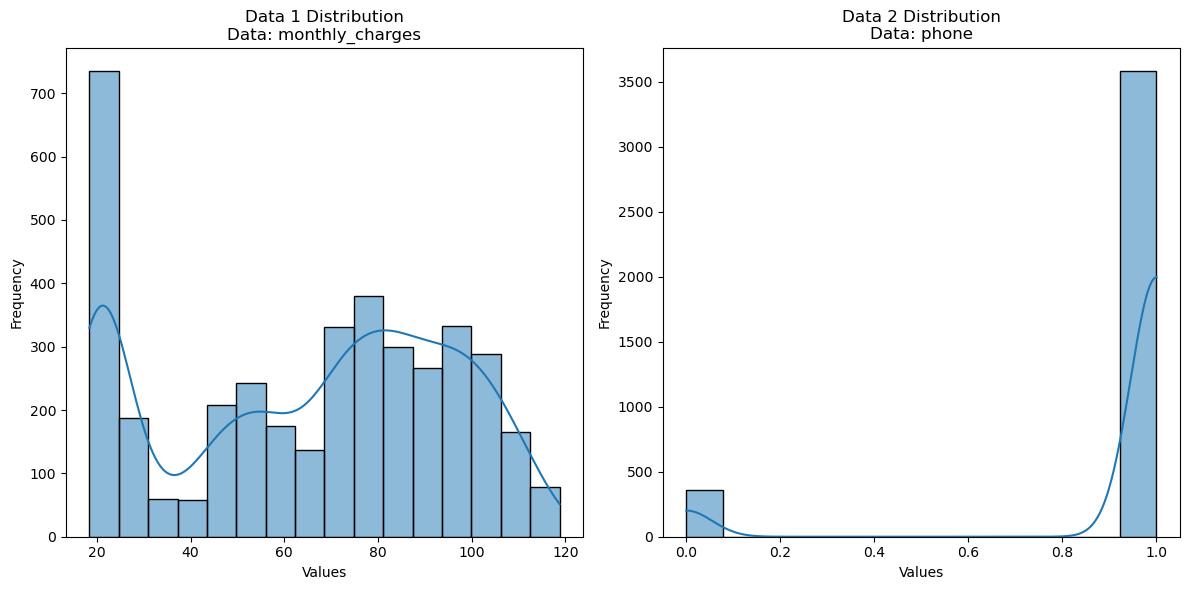

In [83]:
two_sample_t_test(train.monthly_charges, train.phone)

# CONCLUDING TAKEAWAY

- Determine if it would be valuable to bin some numeric columns

    - I was able to bin numeric columns with the numeric datatypes

- Determine if it would be valuable to combine multiple columns into one.

    - Although it did not make a difference in stats testing aggregating some data in columns and grouping decreased cross tabulation and run a more accurate test.

- What are your drivers of churn?

    - In my findings I have found that a customer having phone service does affect the probability of a customer more or less like to churn<br>


**Does it make sense to combine any features?**

  - Yes it does make sense to combine some features that are basically the same
    
**Do you find any surprises?**
  - I think it was surprising that phone service was dependent on churn and we faield to reject the null hypothesis.

In [84]:
train, val, test = w.wrangle_telco()

Found file


In [85]:
#################################################MODEL EVALUATION######################################################## 


In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [87]:
train, val, test = w.wrangle_telco()

Found file


In [88]:
# generated value counts for values of each colum using a for loop
for col in train.columns:

    print(train[col].value_counts())
    print('\n---------------------------------------')

0    3304
1     639
Name: senior_citizen, dtype: int64

---------------------------------------
1     350
72    209
2     129
3     112
4     104
     ... 
47     31
38     31
33     30
44     22
0       8
Name: tenure, Length: 73, dtype: int64

---------------------------------------
20.05    32
19.75    30
19.90    29
19.60    27
20.25    26
         ..
72.85     1
33.90     1
84.15     1
77.75     1
71.75     1
Name: monthly_charges, Length: 1336, dtype: int64

---------------------------------------
20.200000      9
2330.266518    8
19.750000      7
20.050000      7
19.550000      5
              ..
1623.150000    1
218.500000     1
244.100000     1
1710.150000    1
5680.900000    1
Name: total_charges, Length: 3735, dtype: int64

---------------------------------------
1    1993
0    1950
Name: gender, dtype: int64

---------------------------------------
0    2051
1    1892
Name: partner, dtype: int64

---------------------------------------
0    2744
1    1199
Name: dependents, 

In [89]:
#.ravel returns a contigious array
TN, FP, FN, TP = confusion_matrix(y_train, y_predictions).ravel()
TN, FP, FN, TP

NameError: name 'y_train' is not defined

In [ ]:
def knn_3_metrics(TP, TN, FP, FN):
    accuracy = round((TP + TN) / (TP + TN + FP + FN) * 100, 2)
    recall = round(TP / (TP + FN) * 100, 2)
    true_positive_rate = round(TP / (TP + FN) * 100, 2)
    false_positive_rate = round(FP / (FP + TN) *100, 2)
    true_negative_rate = round(TN / (TN + FP) * 100, 2)
    false_negative_rate = round(FN / (FN + TP) * 100, 2)
    precision = round(TP / (TP + FP) * 100, 2)
    f1_score = round((2 * (precision * recall) / (precision + recall)), 2)
    support_neg = TP + FN
    support_pos = FP + TN
    data = {
        'Metric': ['Accuracy', 'Recall', 'True Positive Rate', 'False Positive Rate', 'True Negative Rate', 'False Negative Rate', 'Precision', 'F1-Score', 'Support (0)', 'Support (1)'],
        'Value': [accuracy, recall, true_positive_rate, false_positive_rate, true_negative_rate, false_negative_rate, precision, f1_score, support_neg, support_pos]
    }
    metrics = pd.DataFrame(data, index=None)
    return metrics

conf_matrix = confusion_matrix(y_train, y_predictions)
TN, FP, FN, TP = conf_matrix.ravel()

metrics = knn_3_metrics(TP, TN, FP, FN)
print(metrics)